# Assigment 04: Due 10/1

You can use these imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
import scipy.special as sf
%matplotlib notebook

# Problem 1a

Using Monte Carlo techniques discusses in *02_Integration_MC* notebook, solve the following integral and compare it to the exact solution:

$\int_0^2 \frac{2}{(2^2 + x^2)^{3/2}}dx$

In your Monte Carlo integration, use 10,000 random points.

In [2]:
N = 10000
upper = 2
lower = 0
def f(x):
    return 2/((4+(x**(3/2)))**(3/2))

x = np.linspace(lower,upper,N)
y = f(x)

f_max = max(y)

x_rand = lower+((upper-lower)*np.random.random(N))
y_rand = f_max*np.random.random(N)


ind_below = np.asarray(y_rand < f(x_rand)).nonzero()
ind_above = np.asarray(y_rand >= f(x_rand)).nonzero()

ratio = float(len(ind_below[0])/N)
area = (upper-lower)*f_max
integral = ratio*area
print('integral: {}\n'.format(integral))

integral: 0.36085



In [3]:
real = 1/(2*np.exp2(0.5))
print('The exact solution is {}'.format(real))
print('So our error was {0:.2f}%'.format(100*((integral-real)/real)))

The exact solution is 0.35355339059327373
So our error was 2.06%


# 1b

Make a scatter plot of points below and above the integrand function. This is the some type of graph shown in the *02_Integration_MC* notebook with the blue and green points.

<IPython.core.display.Javascript object>


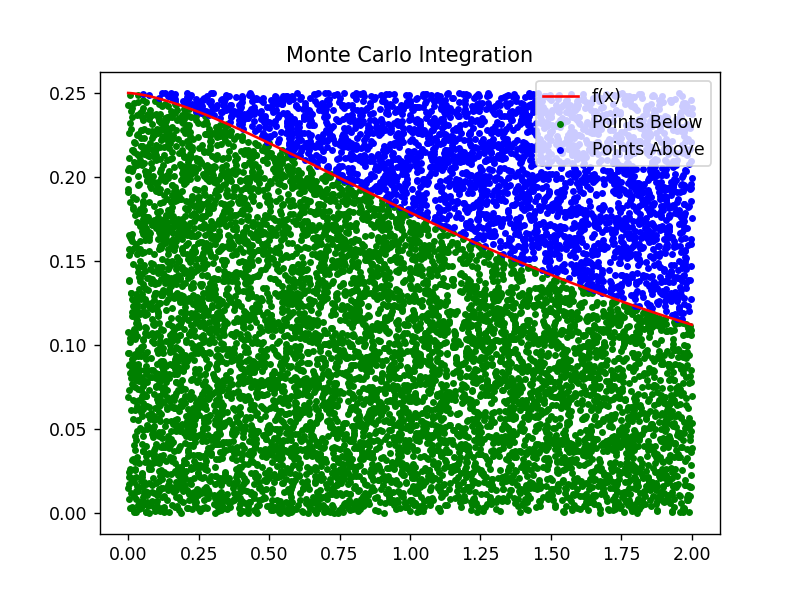

In [4]:
fig = plt.figure()
plt.scatter(x_rand[ind_below], y_rand[ind_below], color = "green", marker = '.',label='Points Below')
plt.scatter(x_rand[ind_above], y_rand[ind_above], color = "blue", marker = '.', label = 'Points Above')
plt.plot(x, y, color = "red", label= 'f(x)')
plt.legend()
plt.title('Monte Carlo Integration');

# Problem 2a
Read in the data set *./data/decay_data.txt*, this lists the time in days, number of particles, and the uncertainty on the particles. This is the same radioactive decay data set used in our fitting example *Fitting_Lecture_Notes* from Module 2b.

Plot the data with its error bars.


<IPython.core.display.Javascript object>


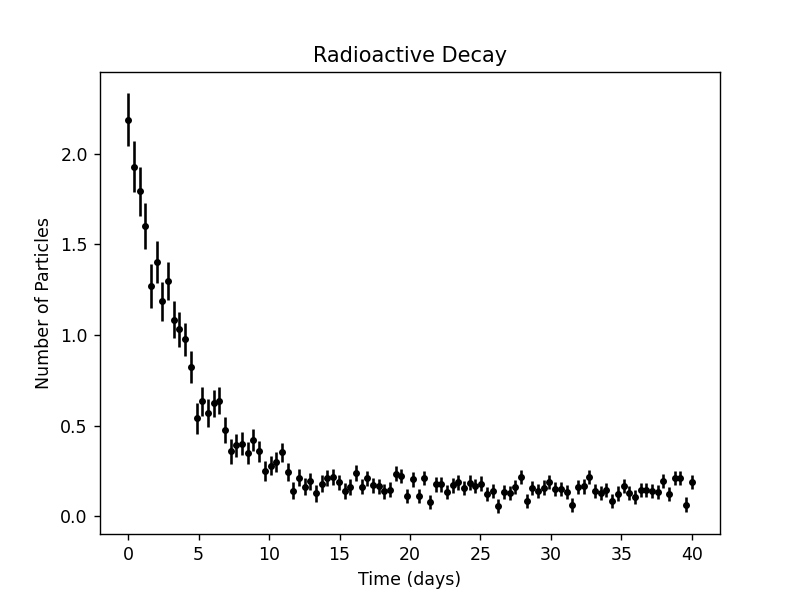

In [5]:
time, parts, uncertainty = np.loadtxt('data/decay_data.txt', unpack=True)
plt.figure()
plt.errorbar(time,parts,yerr=uncertainty, fmt='.k')
plt.title('Radioactive Decay')
plt.xlabel('Time (days)')
plt.ylabel('Number of Particles');

# Problem 2b

Fit the data with 3 fit parameters using MCMC MH algorithm. You should take 10,000 steps and impliment the random test on $\chi ^2$, like we did our *03_MC_Fit* example notebook using the *get_chi_squared* function. For this we will use a function template of: $y = p_0 \cdot e^{-t/p_1} + p_2$,

where $p_0, p_1$, and $p_2$ are the fit parameters. When fitting you should choose starting values of $p_0 = p_1 = p_2 = 1.0$ to avoid nan errors.

In [6]:
def func(t,p0,p1,p2):
    return p0*np.exp(-t/p1)+p2
def get_chi_squared(x, y, sigma, params):
    '''Returns the chi squared of the fit'''
    RR = 0.0
    for i in range(len(x)):
        RR += ((y[i] - func(x[i],*params))**2)/(sigma[i]**2)
    return RR

In [7]:
N = 10000
init_params = np.array([1.0,1.0,1.0])
param_list, RRs = [init_params], [get_chi_squared(time, parts, uncertainty, init_params)]

for i in range (N):
    test_param = [np.random.normal(param_list[-1][0],0.5),np.random.normal(param_list[-1][1],0.5),np.random.normal(param_list[-1][0],0.5)]
    RR_test = get_chi_squared(time, parts, uncertainty, test_param)
    t = (np.random.random() <= (RRs[-1])/RR_test)
    if t:
        param_list.append(test_param)
        RRs.append(RR_test)
    else:
        param_list.append(param_list[-1])
        RRs.append(RRs[-1])    
            
RR_min = np.amin(RRs)
best_i = RRs.index(RR_min)
best_params = param_list[best_i]
print("best p0 = {0:.2f}, best p1 = {1:.2f}, best p2 = {2:.2f},\nchi**2 = {3:.2f},\nlocation = {4}".format(best_params[0], best_params[1], best_params[2], RR_min, best_i))

<ipython-input-6-0b73b5d9833f>:7: RuntimeWarning: overflow encountered in double_scalars
  RR += ((y[i] - func(x[i],*params))**2)/(sigma[i]**2)
<ipython-input-6-0b73b5d9833f>:2: RuntimeWarning: overflow encountered in exp
  return p0*np.exp(-t/p1)+p2
<ipython-input-6-0b73b5d9833f>:2: RuntimeWarning: overflow encountered in double_scalars
  return p0*np.exp(-t/p1)+p2


best p0 = 2.15, best p1 = 4.23, best p2 = 0.18,
chi**2 = 252.58,
location = 231


# Problem 2c

What is the reduced $\chi^2$ of your fit and the p-value?
Is this a good fit?

In [8]:
dof = len(time) - len(best_params) - 1
pvalue = sf.gammaincc(dof/2.0, RR_min/2.0)
print('Fit Results:')
print('chi2 = ',RR_min,'\ndof = ', dof, '\nreduced chi2 = ', RR_min/dof, '\np-value = ',pvalue)
print('This is a decent fit but it could be better')

Fit Results:
chi2 =  252.5777726963205 
dof =  96 
reduced chi2 =  2.631018465586672 
p-value =  5.057850942260934e-16
This is a decent fit but it could be better


# Problem 2d

Plot on the same graph your data and the line showin the fitted function.

<IPython.core.display.Javascript object>


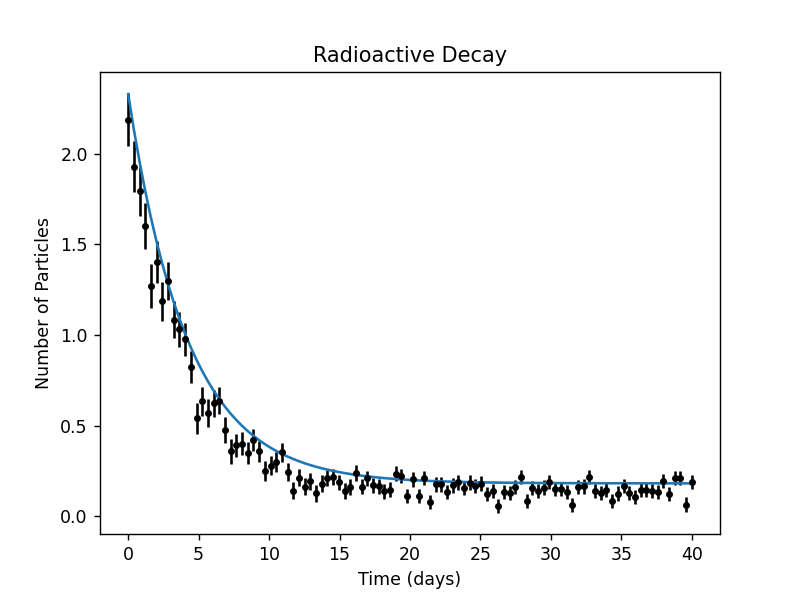

In [9]:
plt.figure()
plt.errorbar(time,parts,yerr=uncertainty, fmt='.k')
plt.plot(time,func(time,*best_params))
plt.title('Radioactive Decay')
plt.xlabel('Time (days)')
plt.ylabel('Number of Particles');

# Problem 2e

Plot the histogram distributions of the three fit parameters.

<IPython.core.display.Javascript object>


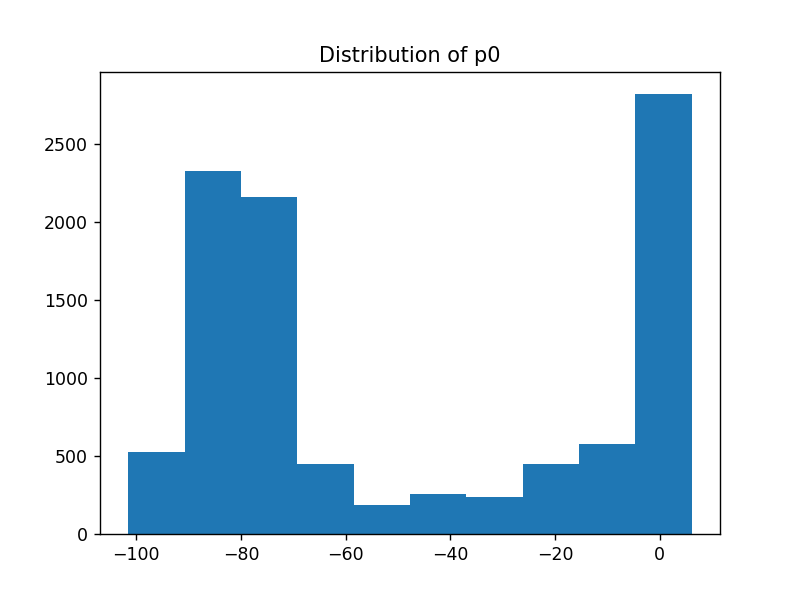

<IPython.core.display.Javascript object>


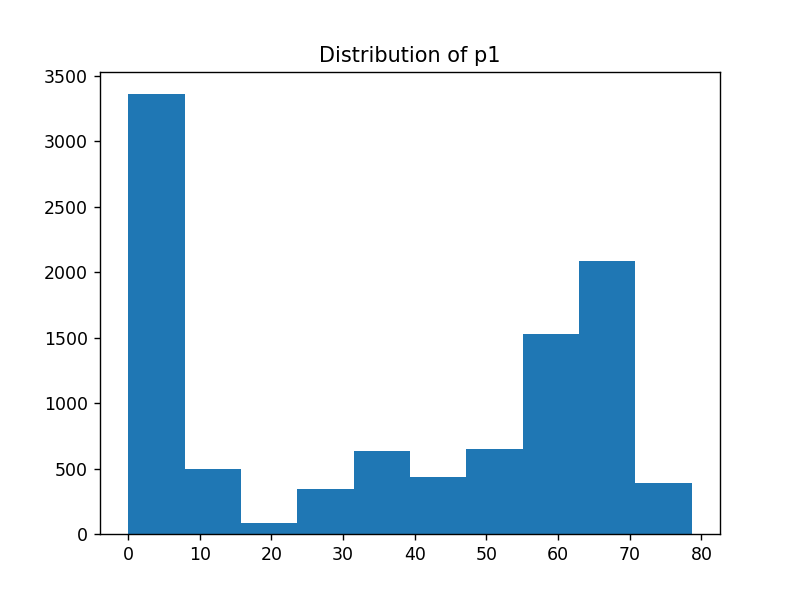

<IPython.core.display.Javascript object>


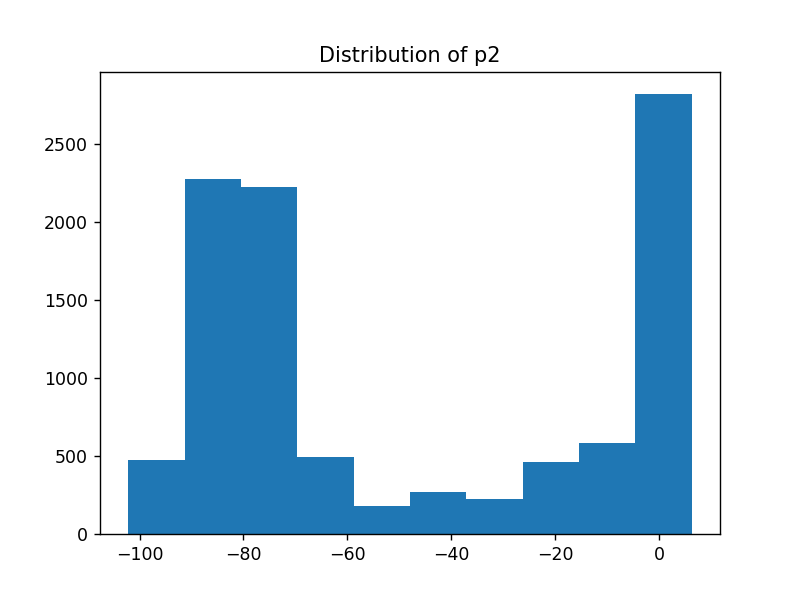

In [10]:
plt.figure()
plt.hist([i[0] for i in param_list])
plt.title('Distribution of p0')
plt.figure()
plt.hist([i[1] for i in param_list])
plt.title('Distribution of p1')
plt.figure()
plt.hist([i[2] for i in param_list])
plt.title('Distribution of p2');